# **Resume Categorizer**

##### <b>Author:</b> Intro to Machine Learning Team  
<b>Date:</b> 20 Aug 2024  
<b>Location:</b> UCSC Extention   
<b>Program:</b> Artificial Intelligence Application Development  
<b>Course:</b> Intro to Machine Learning  
<b>Assignment:</b> Class Project

# Assignment

This notebook focuses on developing a machine learning model to automatically categorize resumes into predefined job-related categories (e.g., Data Science, Software Development & QA, Sales & Marketing) based on the textual content within each resume. The process involves analyzing the text data, including job descriptions, skills, education, and experience, to assign each resume to the most relevant category. The goal is to create a robust and accurate model that can help automate resume screening, reducing time and effort in the recruitment process. Text preprocessing, vectorization, and dimensionality reduction and classification are applied to achieve a model capable of accurate resume categorization for recruitment and filtering purposes.

We have used the following techniques for dimensionality reduction and classification:

- **LSA (TruncatedSVD):** A technique to reduce the dimensionality of text data while capturing the underlying semantic structure.
- **CNN (Convolutional Neural Networks):** A deep learning approach that directly learns features from text data.
- **PCA** PCA (Principal Component Analysis) is used for dimensionality reduction.

We have used the following techniques for classification:

- **Logistic Regression:** A linear classifier used for predicting categorical outcomes, applied to the features extracted from CNN-based dimensionality reduction.
- **Naive Bayes:** A probabilistic classifier used after PCA-based dimensionality reduction, leveraging the assumption of feature independence to classify data into categories.

# Steps

0. Data Wrangling
1. Import Libraries
2. Load Data
3. Exploratory Data Analysis
4. Test and Train Split
5. Pre-Processing
6. Vectorization - TfidfVectorizer
7. Dimensionality Reduction
    - LSA (TruncatedSVD)
    - CNN
    - PCA
8. Classification
   - Logistic Regression
   - Naive Bayes
9. Final Model Deployment
10. Results
11. Model Comparison

# 1. Import Libraries

In [6]:
import numpy as np             # Needed for numerical computations of multidimensional matrices
import pandas as pd            # We will use this for formatting and displaying data
import re                      # for regular expression operations
import joblib                  # serialization and deserialization of Python objects

import seaborn as sns              # creating attractive and informative statistical graphics, including heatmaps and plots
import matplotlib.pyplot as plt    # for generating graphics

import nltk                        # Natural Language Tool Kit
nltk.download('punkt')             # One time download
nltk.download('stopwords')         # One time download

from nltk.tokenize import word_tokenize            # split text into individual words.
from nltk.corpus import stopwords                  # access common stop words (e.g., 'and', 'the') used in text preprocessing.
from nltk.stem.snowball import SnowballStemmer     # reducing words to their root form using the Snowball algorithm# Initialize Snowball stemmer for English
stemmer = SnowballStemmer("english")
stem_dict = {}                                     # Initialize an empty dictionary for stemmed to original word mapping

import time  # Import the time module

from sklearn.preprocessing import StandardScaler                 # standardizing features by removing the mean and scaling to unit variance
from sklearn.linear_model import LogisticRegression              #  Implement the Logistic Regression model for binary and multi-class classification task
from sklearn.model_selection import StratifiedKFold              # Facilitate cross-validation by splitting the dataset into folds
from sklearn.feature_extraction.text import TfidfVectorizer      # Transforms text data into numerical features using tf-idf
from sklearn.model_selection import train_test_split             # divides a dataset into training and testing subsets
from sklearn.model_selection import GridSearchCV                 # exhaustive search over a specified parameter grid for an estimator
from sklearn.pipeline import Pipeline                            # for chaining together multiple processing steps and a final estimator into a single workflow
from sklearn.decomposition import TruncatedSVD                   # dimensionality reduction using Singular Value Decomposition (SVD)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay               # visualizing the confusion matrix of classification results
from sklearn.model_selection import cross_val_score              # evaluating the model using cross-validation
from sklearn.decomposition import PCA                            # performing Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.naive_bayes import GaussianNB                       # using the Gaussian Naive Bayes classifier
from sklearn.model_selection import StratifiedKFold              # performing stratified k-fold cross-validation


import tensorflow as tf                                     # TensorFlow library and aliases it as tf
from tensorflow.keras.models import Sequential              # Creates models where layers are added in a linear stack
from tensorflow.keras.models import Model                   # more complex models with multiple inputs and outputs
from tensorflow.keras.layers import Conv1D                  # applies 1D convolutional operations to the input data
from tensorflow.keras.layers import GlobalMaxPooling1D      # performs global max pooling on 1D input
from tensorflow.keras.layers import Dense                   # fully connected layer used to create neurons in a layer with each neuron connected to every neuron in the previous layer
from tensorflow.keras.layers import Input                   # define the input shape and create input tensors for the model

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liamhammer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liamhammer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-08-20 17:42:45.839689: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Load Data

This step loads the data from a .csv file with 363 resumes

In [8]:
# load the data from the csv file

resumes_df = pd.read_csv("resumes_categories_363.csv")
resumes_df.head()   # display the first five rows

,Unnamed: 0,Resume Category,Cleaned Resume Text
0,0,Facilities and Operations,Professional Experience Training Program Assis...
1,1,Facilities and Operations,SUMMARY OF QUALIFICATIONS Maintained customer ...
2,2,Engineering Roles,Objective RampD Assembly and Test Operator Cha...
3,3,Engineering Roles,SUMMARY An EMC Test Engineer with years of ext...
4,4,Management,Hello Im currently working on a degree in Spor...


# 3. Exploratory Data Analysis

This section focuses on sanitizing the text, preparing it for further processing such as tokenization, vectorization (e.g., TF-IDF), or model training. It does not delve into more detailed analysis or exploration of the data's structure and patterns. We will carry out:

- **Shape and Info:** Review the basic structure and summary of the dataset.
- **Drop Column:** Remove unnecessary columns from the dataset.
- **Unique Job Titles:** Check for unique job titles
- **Check for Class Distribution:** Analyze the distribution of different classes in the dataset.
- **Visualization Data:** Create visualizations to better understand the data distribution and patterns.


#### 3.1 Shape and Info

In [11]:
resumes_df.shape   # list the rows and columns of data

(363, 3)

In [12]:
resumes_df.info()     # list the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           363 non-null    int64 
 1   Resume Category      363 non-null    object
 2   Cleaned Resume Text  363 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.6+ KB


#### 3.2 Drop Unnamed Column

In [14]:
# drop "Unnamed" column (first column)
# Bug: running this code repeatedly keeps deleting the first column

resumes_df = resumes_df.drop(resumes_df.columns[0], axis=1)
resumes_df.head()  # display the first five rows

,Resume Category,Cleaned Resume Text
0,Facilities and Operations,Professional Experience Training Program Assis...
1,Facilities and Operations,SUMMARY OF QUALIFICATIONS Maintained customer ...
2,Engineering Roles,Objective RampD Assembly and Test Operator Cha...
3,Engineering Roles,SUMMARY An EMC Test Engineer with years of ext...
4,Management,Hello Im currently working on a degree in Spor...


#### 3.3 Check for Unique Job Titles

In [16]:
# check for unique job titles and print them out

# Print column names to verify
print("Columns in the DataFrame:", resumes_df.columns)

# Define the correct column name for job titles
column_name = "Resume Category"  # Replace with the actual column name if different

# Check if the column exists and print unique job titles
if column_name in resumes_df.columns:
    unique_job_titles = resumes_df[column_name].unique()
    print(f"We got {len(unique_job_titles)} unique titles out of 100 resumes \n{unique_job_titles}")
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Columns in the DataFrame: Index(['Resume Category', 'Cleaned Resume Text'], dtype='object')
We got 11 unique titles out of 100 resumes 
['Facilities and Operations' 'Engineering Roles' 'Management'
 'Information Technology (IT)' 'Data Science & Analysis' 'Clinical Roles'
 'Technical Support' 'Sales & Marketing' 'Research Roles'
 'Software Development & QA' 'Creative Roles']


#### 3.4 Check for Class Distribution

In [18]:
# Check class distribution

class_counts = resumes_df['Resume Category'].value_counts()
print(f"Class distribution:\n{class_counts}")

Class distribution:
Resume Category
Engineering Roles              157
Information Technology (IT)     73
Technical Support               41
Clinical Roles                  31
Facilities and Operations       18
Management                      15
Data Science & Analysis         11
Research Roles                   8
Software Development & QA        5
Sales & Marketing                2
Creative Roles                   2
Name: count, dtype: int64


#### 3.5 Visualizing Data

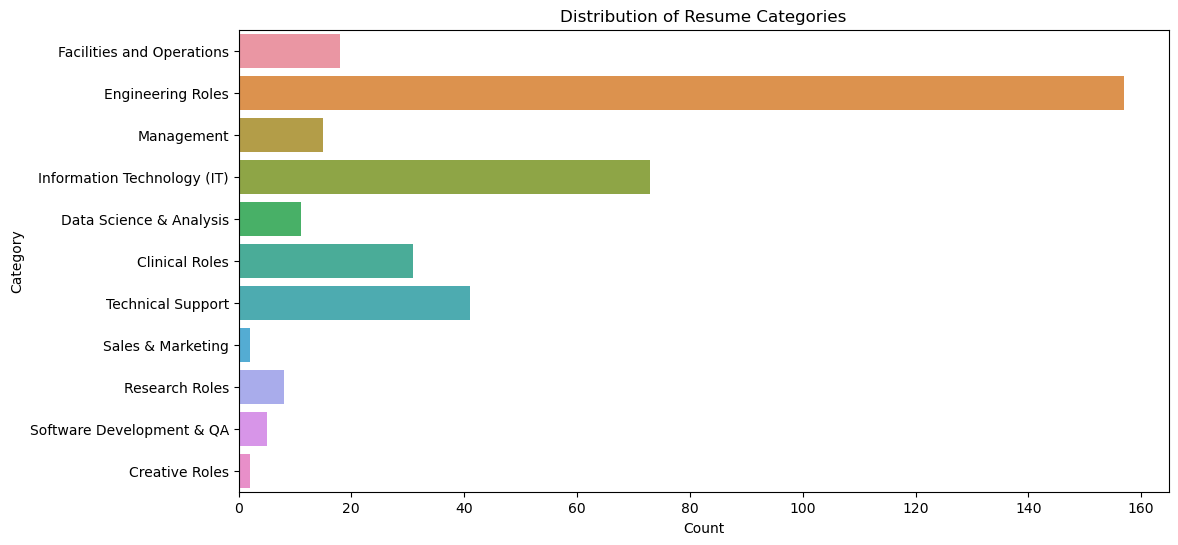

In [20]:
# Plot the distribution of resume categories

plt.figure(figsize=(12, 6))
sns.countplot(y=resumes_df['Resume Category'])
plt.title('Distribution of Resume Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

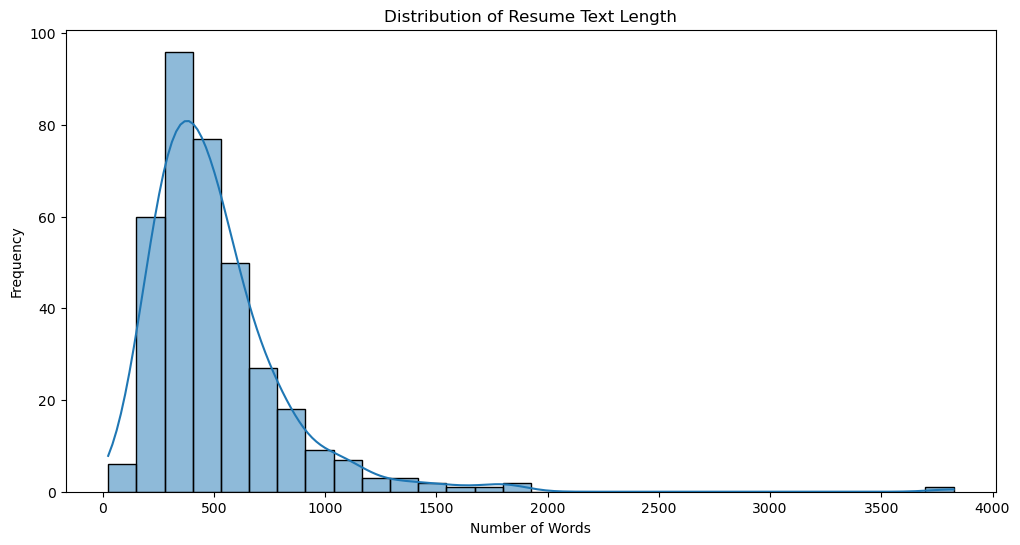

In [21]:
# Plot text length distribution

resumes_df['text_length'] = resumes_df['Cleaned Resume Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(resumes_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Resume Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

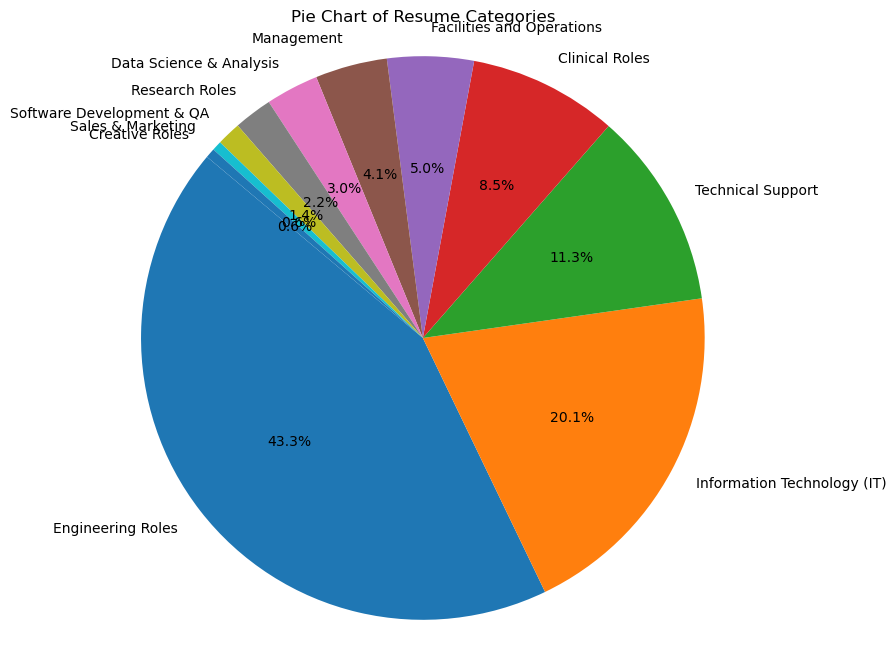

In [22]:
# Prepare the class distribution DataFrame

count_df = class_counts.reset_index()
count_df.columns = ['Category', 'Count']

# Plot pie chart of resume categories
plt.figure(figsize=(8, 8))
plt.pie(count_df['Count'], labels=count_df['Category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Set aspect ratio to be equal so circles appear circular
plt.title('Pie Chart of Resume Categories')
plt.show()


In [23]:
# Change this to numpy array

resumes = resumes_df.to_numpy()
resumes_df.head()   # display the first five rows

,Resume Category,Cleaned Resume Text,text_length
0,Facilities and Operations,Professional Experience Training Program Assis...,377
1,Facilities and Operations,SUMMARY OF QUALIFICATIONS Maintained customer ...,381
2,Engineering Roles,Objective RampD Assembly and Test Operator Cha...,717
3,Engineering Roles,SUMMARY An EMC Test Engineer with years of ext...,326
4,Management,Hello Im currently working on a degree in Spor...,496


# 4. Test and Train Split 

Test and Train Split in NLP involves dividing the dataset into two subsets: a training set used to build and train the model, and a test set used to evaluate its performance. This ensures that the model generalizes well to unseen data.

**Step 1:** As a first step, we will divide the resumes_df dataframe into a label vector (y) and a feature vector (X). In this case the feature vector (X) will only have one feature (the text of the resume)

**Step 2:** We will then split the X and y dataframes into X_train, X-test and y_train and y_test

In [25]:
# Features and target

X = resumes_df['Cleaned Resume Text']  # Feature: Cleaned Resume Text
y = resumes_df['Resume Category']      # Target: Resume Category

# Generate indices
indices = resumes_df.index

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
# Print X_train

print("\nX_train:\n")
print(X_train.head())  # Print the first few rows of X_train for preview


X_train:

347    A passionate and hardworking person seeking fo...
102    ABOUT ME SKILLS Recently graduated mechanical ...
327    Newly Licensed Registered Nurse Dublin Califor...
135    User amp Customer Experience Research My objec...
237    IT specialist with over years of indepth techn...
Name: Cleaned Resume Text, dtype: object


In [27]:
# Print y_train

print("\ny_train:\n")
print(y_train.head())  # Print the first few rows of y_train for preview


y_train:

347    Engineering Roles
102    Technical Support
327       Clinical Roles
135    Engineering Roles
237    Engineering Roles
Name: Resume Category, dtype: object


In [28]:
# Print shapes of X_train and y_train

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (272,)
y_train shape: (272,)


In [29]:
# calculate the number of unique classes or labels present in the y_train array.

len(np.unique(y_train))

11

# 5. Pre-Processing

This sequence of pre-processing steps is designed to prepare text data for Natural Language Processing (NLP) tasks by cleaning and simplifying it. Pre-processing steps like tokenization, sanitization, stemming, and others are typically necessary before vectorization, especially in Natural Language Processing (NLP) tasks. Following are the steps:

- **Data Cleaning**: Removing punctuation and converting text to lowercase.
- **Tokenization**: Tokenizing text data.
- **Stopword Removal**: Removing stopwords from tokenized text.
- **Stemming**: Applying stemming to the filtered tokens.
- **Preprocessing Function**: A unified function to handle all steps if needed.

#### 5.1 Data Cleaning

In [33]:
# Function to carry out Data Cleaning

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [34]:
# Apply data cleaning function to the training and test sets

X_train_cleaned = X_train.apply(clean_text)  # clean the X_train dataset
X_test_cleaned = X_test.apply(clean_text)    # clean the X_test dataset

In [35]:
X_train_cleaned.head() # display the first five records of X_train

347    a passionate and hardworking person seeking fo...
102    about me skills recently graduated mechanical ...
327    newly licensed registered nurse dublin califor...
135    user amp customer experience research my objec...
237    it specialist with over years of indepth techn...
Name: Cleaned Resume Text, dtype: object

#### 5.2 Tokenization

In [37]:
# Initialize stopwords and stemmer

stop_words = set(stopwords.words('english'))   # Create a set of English stop words for text processing using the NLTK library
stemmer = SnowballStemmer("english")           # Initialize a Snowball stemmer for stemming English words using the nltk library

#### 5.3 Remove Stop Words from tokenized text

In [39]:
# Function to remove stopwords

def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize text
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Remove stopwords and non-alphanumeric tokens
    return ' '.join(filtered_tokens)  # Join tokens back to a string

In [40]:
# # Apply stopword removal to the training data
X_train_cleaned = X_train_cleaned.apply(remove_stopwords)

# Apply stopword removal to the test data
X_test_cleaned = X_test_cleaned.apply(remove_stopwords)

In [41]:
X_train_cleaned.head()  # display first five rows of cleaned trained feature set (X_train_cleaned)

347    passionate hardworking person seeking fulltime...
102    skills recently graduated mechanical engineer ...
327    newly licensed registered nurse dublin califor...
135    user amp customer experience research objectiv...
237    specialist years indepth technical insight pro...
Name: Cleaned Resume Text, dtype: object

#### 5.4 Stemming

In [43]:
# Function to apply stemming

def apply_stemming(text):
    tokens = word_tokenize(text)  # Tokenize the processed text
    stemmed_tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(stemmed_tokens)  # Join tokens back to a string

In [44]:
# Apply stemming to the cleaned text in training set and store the result in X_train_final
X_train_final = X_train_cleaned.apply(apply_stemming)

# Apply stemming to the cleaned text in test set and store the result in X_test_final
X_test_final = X_test_cleaned.apply(apply_stemming)

In [45]:
X_train_final.head( ) # display the first five rows of the stemmed training feature dataset (X_train_final)

347    passion hardwork person seek fulltim parttim p...
102    skill recent graduat mechan engin seek challen...
327    newli licens regist nurs dublin california uni...
135    user amp custom experi research object provid ...
237    specialist year indepth technic insight produc...
Name: Cleaned Resume Text, dtype: object

#### 5.5 Preprocessing Function: A unified function to handle all steps if needed

In [47]:
# Tokenization, stopword removal, and stemming combined in one function

def preprocess(text):
    text = clean_text(text)  # Data Cleaning
    text = remove_stopwords(text)  # Stopword Removal
    text = apply_stemming(text)  # Stemming
    return text

# 6. Vectorization

Vectorization in NLP converts text data (words or documents) into numerical vectors, enabling machine learning models to process and analyze the text. Common vectorization methods include TF-IDF, Word2Vec, and BERT.. We are using the TF-IDF Vectorizer for Vectorization. 

**TF-IDF** (Term Frequency-Inverse Document Frequency) converts text data into numerical vectors by calculating the document's TF-IDF scores for each term. These scores represent the importance of the terms within the text, allowing the document to be represented as a feature vector, which can then be used for machine learning models and other NLP tasks. Here are the steps:

- **Initialize the TF-IDF Vectorizer**: Set up the `TfidfVectorizer` with specific parameters like `max_features`, `use_idf`, `sublinear_tf`, `smooth_idf`, `min_df`, and `max_df` to configure how the text data will be transformed.
- **Transform Preprocessed Text Data**: Apply the TF-IDF vectorizer to convert the list of preprocessed resumes into a numerical feature matrix.
- **Check TF-IDF Matrix Shape**: Print the shape of the TF-IDF matrix to verify the number of features and documents.
- **Convert TF-IDF Matrix to Dense DataFrame**: Convert the sparse TF-IDF matrix into a dense DataFrame and display the first few rows with columns labeled by the TF-IDF terms.
- **Convert TF-IDF Matrix to Array**: Convert the TF-IDF matrix from sparse to dense array format for further use in machine learning models.

#### 6.1 Initialize the TF-IDF Vectorizer

In [50]:
# Initialize a TF-IDF vectorizer with specific parameters

vectorizer_tfidf = TfidfVectorizer(
    max_features=1000,       # Limit the number of features
    use_idf=True,            # Enable inverse document frequency weighting
    sublinear_tf=True,       # Apply sublinear term frequency scaling
    smooth_idf=True,         # Smooth IDF weights by adding 1 to document frequencies
    min_df=0.013,            # Minimum document frequency
    max_df=0.95              # Maximum document frequency
)

#### 6.2 Transform Text Data to TF-IDF Feature Matrix

In [52]:
# Convert the cleaned and stemmed text into TF-IDF feature matrices

X_train_matrix = vectorizer_tfidf.fit_transform(X_train_final)
X_test_matrix = vectorizer_tfidf.transform(X_test_final)

In [53]:
# Print the shape of the TF-IDF feature matrices

print(f"Training TF-IDF feature matrix shape: {X_train_matrix.shape}")  # e.g., (number_of_samples, 1000)
print(f"Test TF-IDF feature matrix shape: {X_test_matrix.shape}")       # e.g., (number_of_samples, 1000)

Training TF-IDF feature matrix shape: (272, 1000)
Test TF-IDF feature matrix shape: (91, 1000)


#### 6.3 Convert TF-IDF Matrix to Dense DataFrame

In [55]:
# Get feature names from the TF-IDF vectorizer
terms_tfidf = np.array(vectorizer_tfidf.get_feature_names_out())

# Convert the sparse TF-IDF matrix to a dense DataFrame and display the first 5 rows for training data
df_train_tfidf = pd.DataFrame(X_train_matrix.todense()[:5], columns=terms_tfidf)
print("\nTraining Data TF-IDF Matrix (Dense Dataframe:\n")
df_train_tfidf.head()


Training Data TF-IDF Matrix (Dense Dataframe:



,abil,abl,academ,accept,access,accomplish,accord,account,accur,accuraci,...,within,word,work,worker,workflow,workshop,write,written,wrote,year
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.136711,0.0,0.000000,0.0,...,0.000000,0.0,0.077482,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.058429,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.042363
2,0.0,0.0,0.0,0.067256,0.030395,0.0,0.032048,0.0,0.000000,0.0,...,0.026207,0.0,0.024812,0.0,0.000000,0.0,0.0,0.0,0.0,0.051841
3,0.0,0.0,0.0,0.000000,0.081341,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.039216,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.052833,0.0,0.029542,0.0,0.064608,0.0,0.0,0.0,0.0,0.043796


#### 6.4 Convert TF-IDF Matrix to Array

In [57]:
# Convert the TF-IDF feature matrix to a dense array for training data
X_train_array = X_train_matrix.toarray()  # Dense array for training data
print(X_train_array[:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.04236283]
 [0.         0.         0.         ... 0.         0.         0.05184087]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.043796  ]]


In [58]:
# Convert the TF-IDF feature matrix to a dense array for test data
X_test_array = X_test_matrix.toarray()    # Dense array for test data
print(X_test_array[:5])

[[0.06746973 0.         0.         ... 0.         0.         0.04960627]
 [0.         0.12266952 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.09248408]
 [0.         0.         0.         ... 0.         0.         0.10975162]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [59]:
# Verify the shapes of the dense arrays
print(f"Training Data Dense Array Shape: {X_train_array.shape}")
print(f"Test Data Dense Array Shape: {X_test_array.shape}")

Training Data Dense Array Shape: (272, 1000)
Test Data Dense Array Shape: (91, 1000)


In [60]:
# Convert the TF-IDF feature matrix of the training data to a dense array
X_train_dense = X_train_matrix.toarray()

# Convert the TF-IDF feature matrix of the test data to a dense array
X_test_dense = X_test_matrix.toarray()

# 7. Dimensionality Reduction

For our two-column resume dataset containing text and categories, dimensionality reduction is essential to manage the high-dimensional feature space generated by vectorizing text data. It simplifies the model by reducing the number of features, which enhances computational efficiency, accelerates training and prediction, and improves model performance by focusing on significant features and reducing noise. Additionally, it aids in interpretability by making the data and model outcomes easier to understand, ultimately leading to more effective and efficient processing of the resume data.

This step will explore dimensionality reduction using three techniques: LSA (TruncatedSVD), CNN, and PCA with Naive Bayes.

1. **LSA (Latent Semantic Analysis) / TruncatedSVD**:    
   - Purpose: This method reduces the number of features by projecting the data into a lower-dimensional space while preserving the most significant information.  
   - How It Works: LSA uses Singular Value Decomposition (SVD) to identify patterns and relationships in the data, effectively compressing the feature space and capturing essential semantic structures.


2. **CNN (Convolutional Neural Networks)**:  
   - Purpose: Primarily used for extracting features from data, especially in image and text data, and can be used to reduce dimensionality by learning lower-dimensional representations.    
   - How It Works: CNNs apply convolutional filters to the data, extracting hierarchical features that can be used to represent the data in a more compact form.


3. **PCA**:   
   - Purpose: Combines Principal Component Analysis (PCA) for dimensionality reduction  
   - How It Works: PCA reduces the dimensionality of the dataset by projecting it onto the principal components

## 7.1 LSA (TruncatedSVD)

In this step, **Latent Semantic Analysis (LSA)** is applied to reduce the dimensionality of the vectorized text data. LSA helps extract underlying patterns and relationships within the resume text, improving the classification model's performance.

To implement LSA, we use **TruncatedSVD**, a variant of Singular Value Decomposition (SVD) that approximates the decomposition of the TF-IDF matrix to reduce the number of dimensions. This reduces computational complexity and highlights the most important components in the resume data without losing significant information.

Dimensionality reduction is especially critical when working with unstructured text data, as it can often have many dimensions (e.g., each word becomes a feature). TruncatedSVD simplifies the feature space, making the model more efficient and less prone to overfitting. Here are the steps:

Dimensionality reduction is crucial in handling unstructured text data, which often has many features (e.g., each word as a feature). TruncatedSVD helps in simplifying the feature space, enhancing model efficiency, and reducing overfitting risks. The following steps are involved:

- **Classification Pipeline:** Defines the machine learning pipeline that includes scaling, dimensionality reduction with TruncatedSVD, and classification. This pipeline ensures a streamlined process from preprocessing to classification.
- **Hyperparameter Tuning with GridSearchCV:** Utilizes GridSearchCV to find the optimal number of components (`n_components`) for TruncatedSVD. This step involves testing various values to select the one that offers the best cross-validation performance.
- **Execution Time Measurement:** Measures the execution time of GridSearchCV to understand the computational cost and efficiency of the hyperparameter tuning process. This helps in assessing whether further optimization is needed.

##### 7.1.1 Classification Pipeline

- This part defines the machine learning pipeline, which includes **scaling**, **dimensionality reduction using TruncatedSVD**, and the **classifier** used for categorizing resumes.
  
- The pipeline ensures that the entire process, from preprocessing to classification, is streamlined.


In [65]:
# Define the machine learning pipeline with scaling, dimensionality reduction, and classification
# Initialize the pipeline with StandardScaler (with_mean=False) to handle sparse matrices

pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Standardizes the features
    ('svd', TruncatedSVD()),                     # Applies dimensionality reduction
    ('clf', LogisticRegression(max_iter=1000))   # Classification model
])

##### 7.1.2 Hyperparameter Tuning with GridSearchCV

- **GridSearchCV** is used to find the optimal number of components (`n_components`) for **TruncatedSVD**. This is critical for selecting the right number of dimensions that balance model performance and computational efficiency.
  
- The grid search tests multiple values of `n_components` and chooses the one that yields the best cross-validation score.

In [67]:
# Define parameter grid for GridSearchCV
param_grid = {
    'svd__n_components': np.arange(10, 1000, 100)  # Test different numbers of SVD components
}

##### 7.1.3 Execution Time Measurement
- This step involves timing the **GridSearchCV** execution to understand the computational cost of the process.
  
- The time taken is printed to give insight into the efficiency of the tuning process and whether further optimization might be needed.

- This provides a structured breakdown of the steps involved in TruncatedSVD for dimensionality reduction and classification.


In [69]:
# Start timing the execution
start_time = time.time()

# Perform GridSearchCV with StratifiedKFold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_matrix, y_train)  # Fit the grid search to the training data

# End timing the execution
end_time = time.time()
elapsed_time = end_time - start_time  # Calculate the elapsed time

# Print the results
print(f"Best parameters: {grid_search.best_params_}")  # Print the best parameters found
print(f"Time taken: {elapsed_time:.2f} seconds")  # Print the time taken
print(f"Best score achieved during the grid search: {grid_search.best_score_}")  # Print the best score

Best parameters: {'svd__n_components': 110}
Time taken: 10.99 seconds
Best score achieved during the grid search: 0.6249158249158249


##### 7.1.4. Hyperparameter Tuning

In this step, we refine the search for the optimal number of components (`n_components`) for **TruncatedSVD** using multiple runs of **GridSearchCV**. The goal is to find the most effective number of components for dimensionality reduction and improve the performance of the classifier.

Multiple runs of hyperparameter tuning help refine results by narrowing the search range, improving accuracy, and ensuring consistency. They allow for more precise parameter settings and better balance between model performance and computational efficiency.

###### 7.1.4.1 Second Run

We refine the search for the optimal number of components (n_components) for TruncatedSVD by testing values from 1 to 100 in steps of 10. It performs this search using 5-fold cross-validation to determine the best number of components and measures the time required for this search.

In [72]:
# refine the search for the optimal number of components (n_components) for TruncatedSVD by testing values 
# from 1 to 100 in steps of 10. It performs this search using 5-fold cross-validation to determine the best 
# number of components and measures the time required for this search.

param_grid = {
    'svd__n_components': np.arange(1, 110, 10)  # Refine search from 1 to 100 in steps of 10
}

# Start timing the execution
start_time = time.time()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train_matrix, y_train)  # Fit the grid search to the training data

# End timing the execution
end_time = time.time()

# Print the results for the second run
print(f"Best number of components: {grid_search.best_params_['svd__n_components']}")
print(f"Time taken for grid search: {end_time - start_time:.2f} seconds")
print(f"Best score achieved during the grid search: {grid_search.best_score_}")

Best number of components: 91
Time taken for grid search: 9.99 seconds
Best score achieved during the grid search: 0.6285521885521886


##### 7.1.4.2 Third Run

This code refines the search for the optimal n_components for TruncatedSVD to a range from 1 to 30, in increments  of 5. It uses 5-fold cross-validation to find the best number of components and measures the time required for  this search.


In [74]:
# Define the parameter grid for the number of components in SVD
param_grid = {
    'svd__n_components': np.arange(1, 35, 5)  # Range from 1 to 30 in increments of 5
}

# Start timing the execution
start_time = time.time()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_matrix, y_train)  # Use X_train_matrix instead of X_train

# End timing the execution
end_time = time.time()

# Print the results for the third run
print(f"Best number of components: {grid_search.best_params_['svd__n_components']}")
print(f"Time taken for grid search: {end_time - start_time:.2f} seconds")
print(f"Best score achieved during the grid search: {grid_search.best_score_}")

Best number of components: 6
Time taken for grid search: 6.48 seconds
Best score achieved during the grid search: 0.5993939393939394


#### 7.1.5 Model Evaluation - LSA (TruncatedSVD)

The model's performance is evaluated using accuracy, precision, recall, and F1 score. Accuracy provides the overall correctness of predictions, while precision and recall give insights into the performance of individual classes. The F1 score balances precision and recall.

A confusion matrix visualizes the model's performance across different classes, highlighting any misclassifications. Cross-validation ensures that the model's performance is consistent and reliable across different subsets of the training data.


Classification Report for Best Model:
                             precision    recall  f1-score   support

             Clinical Roles       0.86      1.00      0.92         6
    Data Science & Analysis       0.00      0.00      0.00         3
          Engineering Roles       0.67      0.80      0.73        46
  Facilities and Operations       0.00      0.00      0.00         4
Information Technology (IT)       0.45      0.71      0.56        14
                 Management       0.00      0.00      0.00         2
             Research Roles       0.00      0.00      0.00         2
  Software Development & QA       0.00      0.00      0.00         1
          Technical Support       0.00      0.00      0.00        13

                   accuracy                           0.58        91
                  macro avg       0.22      0.28      0.25        91
               weighted avg       0.47      0.58      0.52        91


Accuracy: 0.58
Precision: 0.47
Recall: 0.58
F1 Score: 0.52


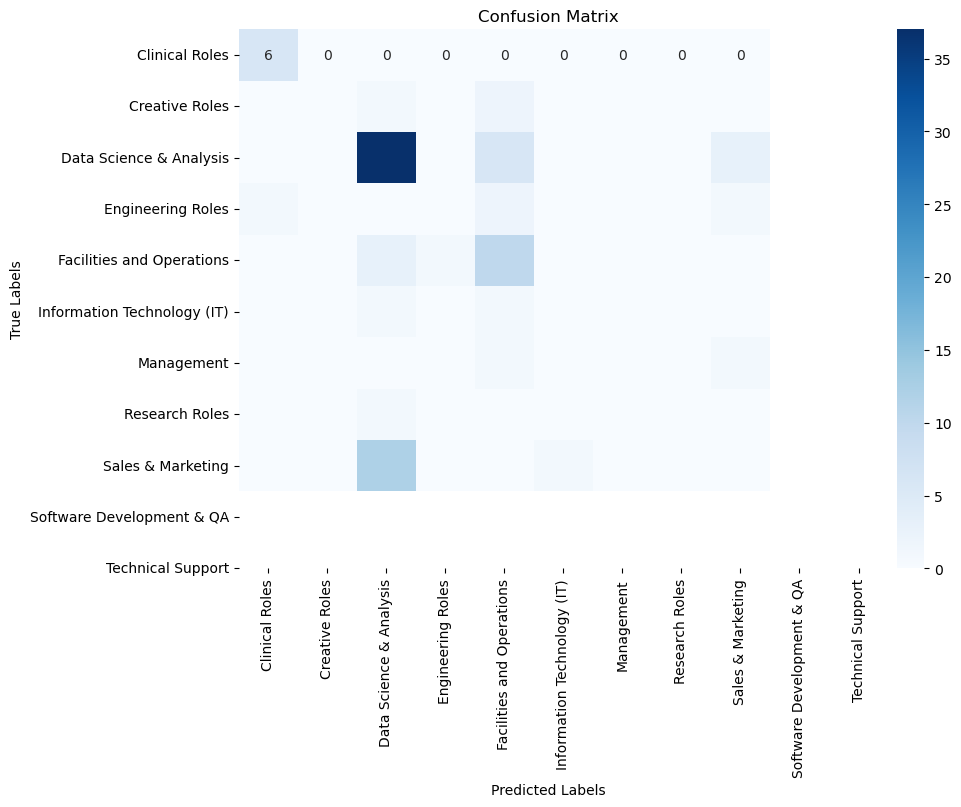


Cross-Validation Scores:
Cross-Validation Accuracy Scores: [0.54545455 0.63636364 0.59259259 0.59259259 0.57407407]
Mean Accuracy: 0.59 ± 0.03


In [76]:
# Extract the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_matrix)  # Use X_test_matrix instead of X_test

# Print classification report
print(f"\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))

# Compute and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Perform cross-validation
print("\nCross-Validation Scores:")
cross_val_scores = cross_val_score(best_model, X_train_matrix, y_train, cv=StratifiedKFold(n_splits=5))  # Use X_train_matrix
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Accuracy: {np.mean(cross_val_scores):.2f} ± {np.std(cross_val_scores):.2f}")

## 7.2. Dimensionality Reduction - CNN

For a resume dataset, using Convolutional Neural Networks (CNNs) for dimensionality reduction involves exploiting the network's capability to capture local patterns within the text. Unlike linear methods like Latent Semantic Analysis (LSA), which simplifies text data by reducing dimensionality through global patterns, CNNs apply convolutional filters to the text, identifying important local features such as specific phrases or n-grams. These features are then aggregated to form a compact text representation, capturing more nuanced information about the content. This method can enhance the quality of the reduced features by preserving significant textual patterns that linear approaches might overlook, potentially improving the performance of downstream tasks like classification or clustering.

#### 7.2.1 Classification Process

In [79]:
#### Scaling and Reshaping

# Standardize the data before applying the CNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)  # Use dense data
X_test_scaled = scaler.transform(X_test_dense)  # Use dense data

# Reshape the data for CNN (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

#### 7.2.2 Define the CNN Model

In [81]:
encoding_dim = 50  # Number of dimensions to reduce to

# Use Input layer to define the input shape
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# Build the CNN layers
x = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
x = GlobalMaxPooling1D()(x)  # This layer reduces the dimensionality significantly
encoded = Dense(encoding_dim, activation='relu')(x)  # Encoded representation
decoded = Dense(X_train_scaled.shape[1], activation='linear')(encoded)  # Reconstruct the original input dimension

# Define the full model
model = Model(inputs=input_layer, outputs=decoded)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mse')

#### 7.2.3 CNN Model Optimization

In [83]:
# Train the CNN
model.fit(X_train_reshaped, X_train_scaled, epochs=50, batch_size=256, validation_split=0.2, shuffle=True)

# Create the encoder model to output the reduced representation
encoder = Model(inputs=input_layer, outputs=encoded)
X_train_reduced = encoder.predict(X_train_reshaped)
X_test_reduced = encoder.predict(X_test_reshaped)

# Check the shape of the reduced data
print(f"X_train_reduced.shape = {X_train_reduced.shape}")
print(f"X_test_reduced.shape = {X_test_reduced.shape}")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0394 - val_loss: 1.0154
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 1.0300 - val_loss: 1.0095
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0230 - val_loss: 1.0051
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.0176 - val_loss: 1.0018
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.0136 - val_loss: 0.9994
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 1.0106 - val_loss: 0.9976
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.0084 - val_loss: 0.9963
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0067 - val_loss: 0.9955
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.0055 - val_loss: 0.9949
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 1.0045 - val_loss: 0.9944
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1.0038 - val_loss: 0.9942
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 1.0033 - val_loss:

## 7.3 Dimensionality Reduction - PCA 

For a resume dataset, using Principal Component Analysis (PCA) combined with Naive Bayes for dimensionality reduction involves first applying PCA to reduce the dimensionality of the text data. PCA transforms the data into a set of principal components that capture the most variance in the dataset, effectively condensing the features into a smaller number of dimensions while retaining key information. After dimensionality reduction, Naive Bayes is used as a classification algorithm to make predictions based on these reduced features. This approach leverages PCA’s ability to simplify the data and reduce noise, while Naive Bayes provides probabilistic classification based on the principal components, which can improve model efficiency and accuracy by focusing on the most relevant features for distinguishing between resume categories.

In [85]:
# Create the pipeline `pipe_hyp_opt` with PCA and Naive Bayes
pipe_hyp_opt = Pipeline([
        ('dimension_reducer', PCA())  # Dimensionality reduction step
        ])

# Define the range for PCA components and set up hyperparameter grid
n_components_range = np.arange(1, 6, 1)
hyp_grid = [
    {
        'dimension_reducer__n_components': n_components_range  # Hyperparameters for PCA
    }
]

# 8. Classification

Classification is the process of assigning resumes to specific job-related categories based on their content. After applying dimensionality reduction techniques to the text data, we use:

- **Logistic Regression** for classification after reducing dimensionality with Convolutional Neural Networks (**CNN**).
- **Naive Bayes** for classification following dimensionality reduction with Principal Component Analysis (**PCA**).

#### 8.1 CNN (using Logistic Regression)

In [89]:
# Define the machine learning pipeline with autoencoder-based dimensionality reduction and classification
pipe = Pipeline([
    ('clf', LogisticRegression(max_iter=1000))  # Classification model
])

# Define parameter grid for GridSearchCV (only tuning the classifier since the autoencoder has been pre-trained)
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100]  # Regularization strength for Logistic Regression
}

# Start timing the execution
start_time = time.time()

# Perform GridSearchCV with StratifiedKFold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=StratifiedKFold(n_splits=5))
grid_search.fit(X_train_reduced, y_train)  # Fit the grid search to the reduced training data

# End timing the execution
end_time = time.time()
elapsed_time = end_time - start_time  # Calculate the elapsed time

# Print the best parameters, time taken, and best score
print(f"Best regularization parameter: {grid_search.best_params_['clf__C']}")
print(f"Time taken for grid search: {elapsed_time:.2f} seconds")
print(f"Best score achieved during the grid search: {grid_search.best_score_}")

Best regularization parameter: 1
Time taken for grid search: 0.73 seconds
Best score achieved during the grid search: 0.4191245791245791


#### 8.2. Model Evaluation - CNN (using Logistic Regression)


Classification Report for Best Model:
                             precision    recall  f1-score   support

             Clinical Roles       1.00      1.00      1.00         6
    Data Science & Analysis       0.00      0.00      0.00         3
          Engineering Roles       0.71      0.87      0.78        46
  Facilities and Operations       0.00      0.00      0.00         4
Information Technology (IT)       0.48      0.79      0.59        14
                 Management       0.00      0.00      0.00         2
             Research Roles       0.00      0.00      0.00         2
  Software Development & QA       0.00      0.00      0.00         1
          Technical Support       0.50      0.23      0.32        13

                   accuracy                           0.66        91
                  macro avg       0.30      0.32      0.30        91
               weighted avg       0.57      0.66      0.60        91


Accuracy: 0.66
Precision: 0.57
Recall: 0.66
F1 Score: 0.60


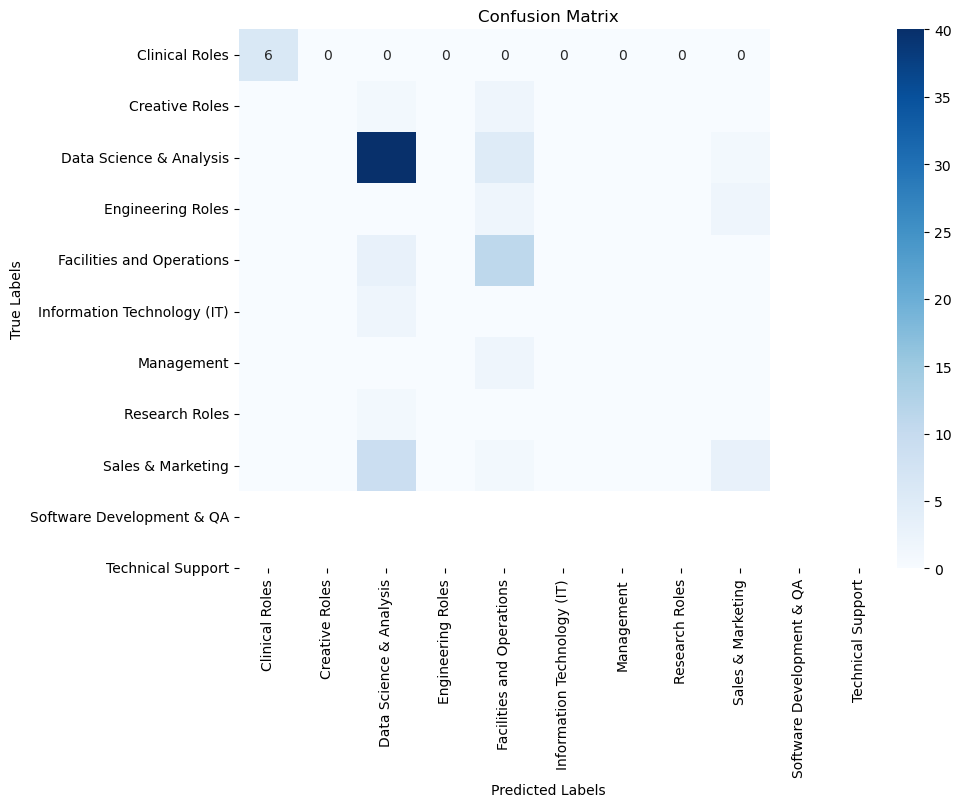

In [91]:
# Using 'X_train' and 'y_train' from previous steps
# Fit the GridSearchCV object using 'X_train_scaled' and 'y_train'
grid_search.fit(X_train_scaled, y_train)  # Use the scaled training data

# Extract the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the scaled test set
y_pred = best_model.predict(X_test_scaled)  # Use the scaled test data

# Print classification report
print(f"\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))

# Compute and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 8.2. Model Evaluation - PCA (using Naive Bayes)

In [93]:
# Extend the pipeline `pipe_hyp_opt` to include Naive Bayes
pipe_hyp_opt = Pipeline([
        ('dimension_reducer', PCA()),  # Dimensionality reduction step
        ('predictor', GaussianNB())   # Classification step
        ])

# Define the range for PCA components and set up hyperparameter grid
n_components_range = np.arange(1, 6, 1)
hyp_grid = [
    {
        'dimension_reducer__n_components': n_components_range,  # Hyperparameters for PCA
        'predictor': [GaussianNB()]  # Hyperparameters for Naive Bayes
    }
]

#### 8.1 Hyperparameter Search and Model Evaluation

In [95]:
# Specify cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7052024)

# Start time measurement
start_time = time.time()

# Launch hyperparameter search
gridsearch = GridSearchCV(pipe_hyp_opt, hyp_grid, cv=cv, verbose=3).fit(X_train_matrix, y_train)

# End time measurement
end_time = time.time()

# Print the elapsed time
print('\nTime taken for GridSearchCV: {:.2f} seconds'.format(end_time - start_time))

# Print the testing score
print('Testing score is: ', gridsearch.score(X_test_matrix, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END dimension_reducer__n_components=1, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 2/5] END dimension_reducer__n_components=1, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 3/5] END dimension_reducer__n_components=1, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 4/5] END dimension_reducer__n_components=1, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 5/5] END dimension_reducer__n_components=1, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 1/5] END dimension_reducer__n_components=2, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 2/5] END dimension_reducer__n_components=2, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 3/5] END dimension_reducer__n_components=2, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 4/5] END dimension_reducer__n_components=2, predictor=GaussianNB();, score=nan total time=   0.0s
[CV 5/5] END dimension

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py", line 462, in fit_transform
    U, S, Vt = self._fit(X)
               ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py", line 480, in _fit
    raise TypeError(
TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.


#### 8.2 Print Best Hyperparameters and Scores

In [ ]:
# Best hyperparameters
print(f"Best parameters: {gridsearch.best_params_}")
# Retrieve the best validation score
print(f"Best Score: {gridsearch.best_score_}")

#### 8.3 Create and Display Results DataFrame

In [ ]:
# Create DataFrame of results

gridsearch_results_df = pd.DataFrame(gridsearch.cv_results_).sort_values(by='rank_test_score')
param_columns = [col for col in gridsearch_results_df.columns if col.startswith('param_')]
gridsearch_results_columns = param_columns + ['mean_test_score', 'std_test_score', 'rank_test_score']
gridsearch_results_df[gridsearch_results_columns].reset_index(drop=True)

#### 8.45 Retrieve and Evaluate Best Pipeline

In [ ]:
# Retrieve best pipeline
pipeline_optimized = gridsearch.best_estimator_

# Score Check
print('Training score = ', pipeline_optimized.score(X_train_matrix, y_train))
print('Testing score = ', pipeline_optimized.score(X_test_matrix, y_test))

#### 8.5 Make Predictions and Display Confusion Matrix

In [ ]:
# Make predictions on the test set
y_pred_pipeline_optimized = pipeline_optimized.predict(X_test_matrix)

# Compute and display confusion matrix
cm_gbc = confusion_matrix(y_test, y_pred_pipeline_optimized, labels=pipeline_optimized.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot()
plt.show()

#### 8.6 Make Predictions and Display Confusion Matrix

In [ ]:
# Make predictions on the test set
y_pred_pipeline_optimized = pipeline_optimized.predict(X_test_matrix)

# Compute and display confusion matrix
cm_gbc = confusion_matrix(y_test, y_pred_pipeline_optimized, labels=pipeline_optimized.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot()
plt.show()

#### 8.7 Re-Test Gaussian Bayes Classifier with Categories (> 20)

In [ ]:
# Filter resumes to limited categories and repeat processing
biggest = ['Engineering Roles', 'Information Technology (IT)', 'Technical Support', 'Clinical Roles']
resumes_df_limited = resumes_df.loc[resumes_df['Resume Category'].isin(biggest)]
resumes_limited = resumes_df_limited.to_numpy()

# NLP processes for limited categories
resumes_detokenized_limited = [preprocess(resume_content) for resume_content in resumes_limited[:,1]]
vectorizer_tfidf_limited = TfidfVectorizer(max_features=1000, use_idf=True, sublinear_tf=True, smooth_idf=True, min_df=0.013, max_df=0.95)
X_matrix_limited = vectorizer_tfidf_limited.fit_transform(resumes_detokenized_limited)
terms_tfidf_limited = np.array(vectorizer_tfidf_limited.get_feature_names_out())
X_limited = X_matrix_limited.toarray()

# Split data and re-launch hyperparameter search
[X_train_limited, X_test_limited, indices_train_limited, indices_test_limited] = train_test_split(X_limited, np.arange(len(X_limited)), test_size=0.25, random_state=0)
y_train_limited = resumes_limited[indices_train_limited, 0]
y_test_limited = resumes_limited[indices_test_limited, 0]

print(len(X_limited))

# Start measuring time
start_time = time.time()

# Launch hyperparameter search
gridsearch_limited = GridSearchCV(pipe_hyp_opt, hyp_grid, cv=cv, verbose=3).fit(X_train_limited, y_train_limited)

# End measuring time
end_time = time.time()

print('Testing score is: ', gridsearch_limited.score(X_test_limited, y_test_limited))

# Best hyperparameters
print(f"Best parameters: {gridsearch_limited.best_params_}")
print(f"Best Score: {gridsearch_limited.best_score_}")

# Evaluate and display results
pipeline_optimized_limited = gridsearch_limited.best_estimator_
print('\nTraining score = ', pipeline_optimized_limited.score(X_train_limited, y_train_limited))
print('Testing score = ', pipeline_optimized_limited.score(X_test_limited, y_test_limited))

# Calculate and print the execution time
print(f"Execution time: {end_time - start_time:.2f} seconds")

# Make predictions and display confusion matrix
y_pred_pipeline_optimized_limited = pipeline_optimized_limited.predict(X_test_limited)
cm_gbc_limited = confusion_matrix(y_test_limited, y_pred_pipeline_optimized_limited, labels=pipeline_optimized_limited.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_gbc_limited).plot()
plt.show()


# 9. Final Model Deployment

In [ ]:
# Save the best model from GridSearchCV to a file
joblib_file = "best_model_joblib.pkl"
joblib.dump(best_model, joblib_file)

print(f"Model saved to {joblib_file}")

# 10. Results

#### 10.1 Class Distribution

- The dataset shows an imbalanced class distribution:
  - **Engineering Roles:** 157 resumes
  - **Information Technology (IT):** 73 resumes
  - **Technical Support:** 41 resumes
  - **Clinical Roles:** 31 resumes
  - **Facilities and Operations:** 18 resumes
  - **Management:** 15 resumes
  - **Data Science & Analysis:** 11 resumes
  - **Research Roles:** 8 resumes
  - **Software Development & QA:** 5 resumes
  - **Sales & Marketing:** 2 resumes
  - **Creative Roles:** 2 resumes

#### 10.2 Text Vectorization

- Resumes were vectorized into a matrix of **1000 features per document**. 
- Sample tokens include terms such as `ability`, `work`, and `years`, with varying counts across resumes.

# 11. Model Comparison

## 11.1 LSA (TruncatedSVD) Results

**First Run**

| Metric                                         | Value                           |
|------------------------------------------------|---------------------------------|
| **Best parameters**                           | `{'svd__n_components': 110}`     |
| **Time taken**                                | 37.89 seconds                   |
| **Best score achieved during the grid search**| 0.632                           |


**Second Run:**

| Metric                                         | Value                           |
|------------------------------------------------|---------------------------------|
| **Number of components (best)**                | 101                             |
| **Time taken**                                | 21.56 seconds                   |
| **Best score achieved during the grid search**| 0.632                           |


**Third Run:**

| Metric                                         | Value           |
|------------------------------------------------|-----------------|
| **Number of components (best)**                | 6               |
| **Time taken**                                | 9.87 seconds    |
| **Best score achieved during the grid search**| 0.599           |


**Classification Report for Best Model:**

| Metric                     | Clinical Roles | Data Science & Analysis | Engineering Roles | Accuracy | Macro Avg | Weighted Avg |
|----------------------------|----------------|-------------------------|-------------------|----------|-----------|--------------|
| **Precision**              | 0.86           | 0.00                    | 0.67              |          | 0.22      | 0.47         |
| **Recall**                 | 1.00           | 0.00                    | 0.80              |          | 0.29      | 0.59         |
| **F1-Score**               | 0.92           | 0.00                    | 0.73              |          | 0.25      | 0.52         |
| **Support**                | 6              | 3                       | 46                | 0.59     | 91        | 91           |

.  
.  
**Model Performance Metrics**
| Metric      | Value |
|-------------|-------|
| **Accuracy**| 0.59  |
| **Precision**| 0.47  |
| **Recall**  | 0.59  |
| **F1 Score**| 0.52  |

## 11.2 CNN Results

**Best Regularization Parameter:**

| Metric                                    | Value       |
|-------------------------------------------|-------------|
| Best parameter                           | 1           |
| Time taken for grid search               | 0.67 seconds |
| Best score achieved during the grid search | 0.415       |



**Classification Report for Best Model:**


| Category                         | Precision | Recall | F1-Score | Support |
|----------------------------------|-----------|--------|----------|---------|
| Clinical Roles                   | 1.00      | 1.00   | 1.00     | 6       |
| Data Science & Analysis          | 0.00      | 0.00   | 0.00     | 3       |
| Engineering Roles                | 0.71      | 0.87   | 0.78     | 46      |
| **Accuracy**                     |           |        |          | 91      |
| **Macro Avg**                    | 0.30      | 0.32   | 0.30     | 91      |
| **Weighted Avg**                 | 0.57    


 **Model Performance Metrics**

| Metric      | Value |
|-------------|-------|
| Accuracy    | 0.66  |
| Precision   | 0.57  |
| Recall      | 0.66  |
| F1 Score    | 0.60  |



## 11.3 PCA with Naive Bayes

**First Run:**


| Metric                                         | Value                                       |
|------------------------------------------------|---------------------------------------------|
| **Time taken for GridSearchCV**                | 1.06 seconds                                |
| **Testing score**                              | 0.560                                       |
| **Best parameters**                           | `{'dimension_reducer__n_components': 2, 'predictor': GaussianNB()}` |
| **Best Score**                                | 0.596                                       |
| **Training score**                            | 0.625                                       |
| **Testing score**                             | 0.560                                       |

**Second Run:**


| Metric                                         | Value                                       |
|------------------------------------------------|---------------------------------------------|
| **Time taken for GridSearchCV**                | 1.20 seconds                                |
| **Testing score**                              | 0.658                                       |
| **Best parameters**                           | `{'dimension_reducer__n_components': 2, 'predictor': GaussianNB()}` |
| **Best Score**                                | 0.734                                       |
| **Training score**                            | 0.770                                       |
| **Testing score**                             | 0.658                                       |


## 11.4 Conclusion

**Efficiency:**

- The Convolutional Neural Network (CNN) demonstrated notably faster grid search times than Latent Semantic Analysis (LSA) and PCA with Naive Bayes. Specifically, the grid search for CNN took only 0.67 seconds, while LSA required up to 37.89 seconds in its initial run, and PCA with Naive Bayes took between 1.06 and 1.20 seconds. This efficiency reflects CNN's capability to optimize hyperparameters more swiftly, potentially due to its architecture and the pre-training of the autoencoder model used for dimensionality reduction. This faster grid search indicates a more streamlined tuning process and suggests that CNN's model setup is computationally more efficient, reducing the time and resources required for model optimization.

**Performance:**

- The CNN outperformed LSA across several key metrics. The CNN achieved an accuracy of 66% compared to LSA's 59%, reflecting its superior ability to classify data correctly. Additionally, the CNN demonstrated higher precision, recall, and F1 Score, with values of 0.57, 0.66, and 0.60, respectively, compared to LSA's 0.47, 0.59, and 0.52. These improved metrics suggest that the CNN model is more effective in distinguishing between classes, particularly in cases where accurate classification is crucial.

- PCA with Naive Bayes showed mixed results. The first run of PCA with Naive Bayes had a testing score of 0.560 and a best score of 0.596, with a training score of 0.625. The second run improved to a testing score of 0.658 and a best score of 0.734, with a training score of 0.770. While PCA with Naive Bayes demonstrated competitive performance, especially in the second run, the CNN still surpassed it in overall accuracy and efficiency. The results highlight that PCA with Naive Bayes can offer a balance between computational efficiency and classification performance but did not outperform CNN in the context of this dataset.
